In [1]:
import cv2
import numpy as np
import sys
import torch
from src.fusionModel.nn.segment import SegmentFocus
torch.set_float32_matmul_precision('medium')

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(tensor([[[[-0.2639,  0.1286,  0.3358,  ...,  0.2766, -1.0417,  0.3238],
          [-0.1700,  0.4756,  0.2984,  ...,  0.5208,  1.1520,  0.4297],
          [ 0.2168, -0.7307, -0.5902,  ...,  0.5558,  0.1703,  0.0096],
          ...,
          [ 0.4828, -0.9042,  0.0231,  ..., -0.4141, -0.0065, -0.5562],
          [ 0.6448, -0.8670,  0.4893,  ..., -0.2185, -0.4823, -0.4427],
          [-0.1555, -0.0500,  0.2649,  ..., -0.3009,  0.5013,  0.0071]],

         [[ 0.2669,  0.6168,  0.2888,  ..., -0.1214,  0.1197,  0.5269],
          [ 2.0742, -1.1633,  0.2541,  ..., -0.1385,  0.8970, -0.1333],
          [-0.0726, -1.5518,  0.8157,  ...,  0.4018, -0.4155, -0.1061],
          ...,
          [ 0.0635, -1.0894,  0.2075,  ...,  0.9855,  1.2880, -0.4142],
          [ 0.7637, -0.1921, -0.5270,  ..., -0.9835, -0.2739, -0.6790],
          [ 1.3411, -0.2133,  0.7340,  ..., -0.3519, -0.0477, -0.9888]],

         [[ 0.1722,  0.6506, -0.4471,  ...,  0.6433,  0.5148,  0.6899],
          [ 0.1775,  1.1621, 

In [32]:
import cv2
import torch
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


# Open the image using PIL
image1 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageA/007_A.png')
image2 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageB/007_B.png')
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformations to the image
image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)
gt_image = image1
gt_mask = torch.ones_like(gt_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


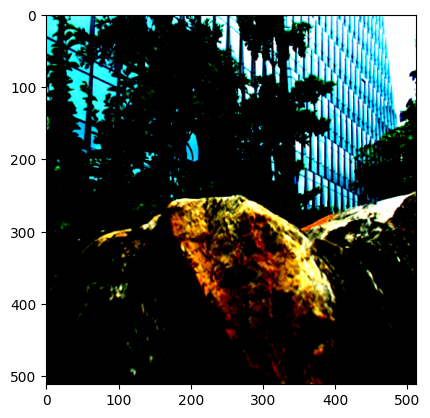

In [35]:
plt.imshow(image2[0].permute(1,2,0).numpy())

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegmentFocus([16, 16, 32, 32], 16)
model = model.to(device)
dummy_output = model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))
model = torch.compile(model)
model.load_state_dict(torch.load('/home/anirudhan/project/image-fusion/results/checkpoints/model_55.pth')['model_state_dict'])

<All keys matched successfully>

In [26]:
model = model.eval()
output, output_mask = model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))

In [27]:
output = output.squeeze().detach().cpu().permute(1, 2, 0).numpy()
output_mask = output_mask.squeeze().detach().cpu().permute(1, 2, 0).numpy()

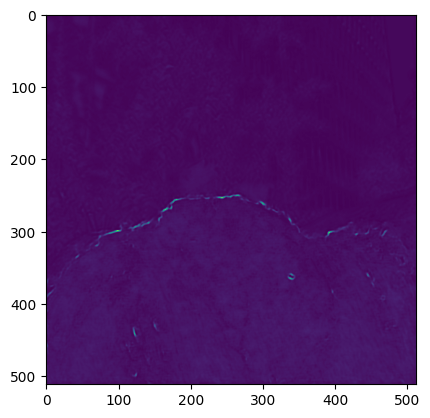

In [31]:
plt.imshow(output_mask[:,:,1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


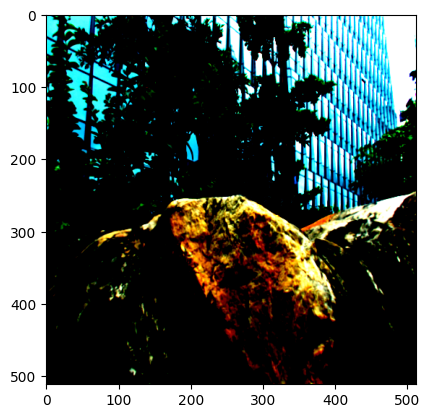

In [29]:
plt.imshow(output)